### Hard MMLU prompts

In [47]:
import pandas as pd
claude3_hard = pd.read_csv('data/mmlu_claude3_hard.csv')
gpt4_hard = pd.read_csv('data/mmlu_gpt4_hard.csv')

In [48]:
mapping = ['A', 'B', 'C', 'D']
claude3_hard['Answer'] = claude3_hard['Answer'].map(lambda x: mapping[x])
gpt4_hard['Answer'] = gpt4_hard['Answer'].map(lambda x: mapping[x])

In [49]:
claude3_hard['Original Answer'] = claude3_hard['Original Answer'].apply(lambda x: x.replace('(', '').replace(')', ''))
claude3_hard['Interrogative Answer'] = claude3_hard['Interrogative Answer'].apply(lambda x: x.replace('(', '').replace(')', ''))
claude3_hard['Declarative Answer'] = claude3_hard['Declarative Answer'].apply(lambda x: x.replace('(', '').replace(')', ''))
claude3_hard['Imperative Answer'] = claude3_hard['Imperative Answer'].apply(lambda x: x.replace('(', '').replace(')', ''))

gpt4_hard['Original Answer'] = gpt4_hard['Original Answer'].apply(lambda x: x.replace('(', '').replace(')', ''))
gpt4_hard['Interrogative Answer'] = gpt4_hard['Interrogative Answer'].apply(lambda x: x.replace('(', '').replace(')', ''))
gpt4_hard['Declarative Answer'] = gpt4_hard['Declarative Answer'].apply(lambda x: x.replace('(', '').replace(')', ''))
gpt4_hard['Imperative Answer'] = gpt4_hard['Imperative Answer'].apply(lambda x: x.replace('(', '').replace(')', ''))

In [50]:
claude3_hard['Original Correct'] = claude3_hard['Original Answer'] == claude3_hard['Answer']
claude3_hard['Interrogative Correct'] = claude3_hard['Interrogative Answer'] == claude3_hard['Answer']
claude3_hard['Declarative Correct'] = claude3_hard['Declarative Answer'] == claude3_hard['Answer']
claude3_hard['Imperative Correct'] = claude3_hard['Imperative Answer'] == claude3_hard['Answer']

gpt4_hard['Original Correct'] = gpt4_hard['Original Answer'] == gpt4_hard['Answer']
gpt4_hard['Interrogative Correct'] = gpt4_hard['Interrogative Answer'] == gpt4_hard['Answer']
gpt4_hard['Declarative Correct'] = gpt4_hard['Declarative Answer'] == gpt4_hard['Answer']
gpt4_hard['Imperative Correct'] = gpt4_hard['Imperative Answer'] == gpt4_hard['Answer']

In [51]:
claude3_hard['Model'] = 'Claude 3'
gpt4_hard['Model'] = 'GPT-4'

In [52]:
df = pd.concat([
    gpt4_hard[['Model', 'Original Correct', 'Interrogative Correct', 'Declarative Correct', 'Imperative Correct']],
    claude3_hard[['Model', 'Original Correct', 'Interrogative Correct', 'Declarative Correct', 'Imperative Correct']]
])

df.rename(columns={
    'Original Correct': 'Original',
    'Interrogative Correct': 'Interrogative',
    'Declarative Correct': 'Declarative',
    'Imperative Correct': 'Imperative'
}, inplace=True)

In [53]:
df.groupby(['Model']).mean()

,Original,Interrogative,Declarative,Imperative
Model,,,,
Claude 3,0.695,0.71,0.720,0.68
GPT-4,0.755,0.74,0.765,0.75


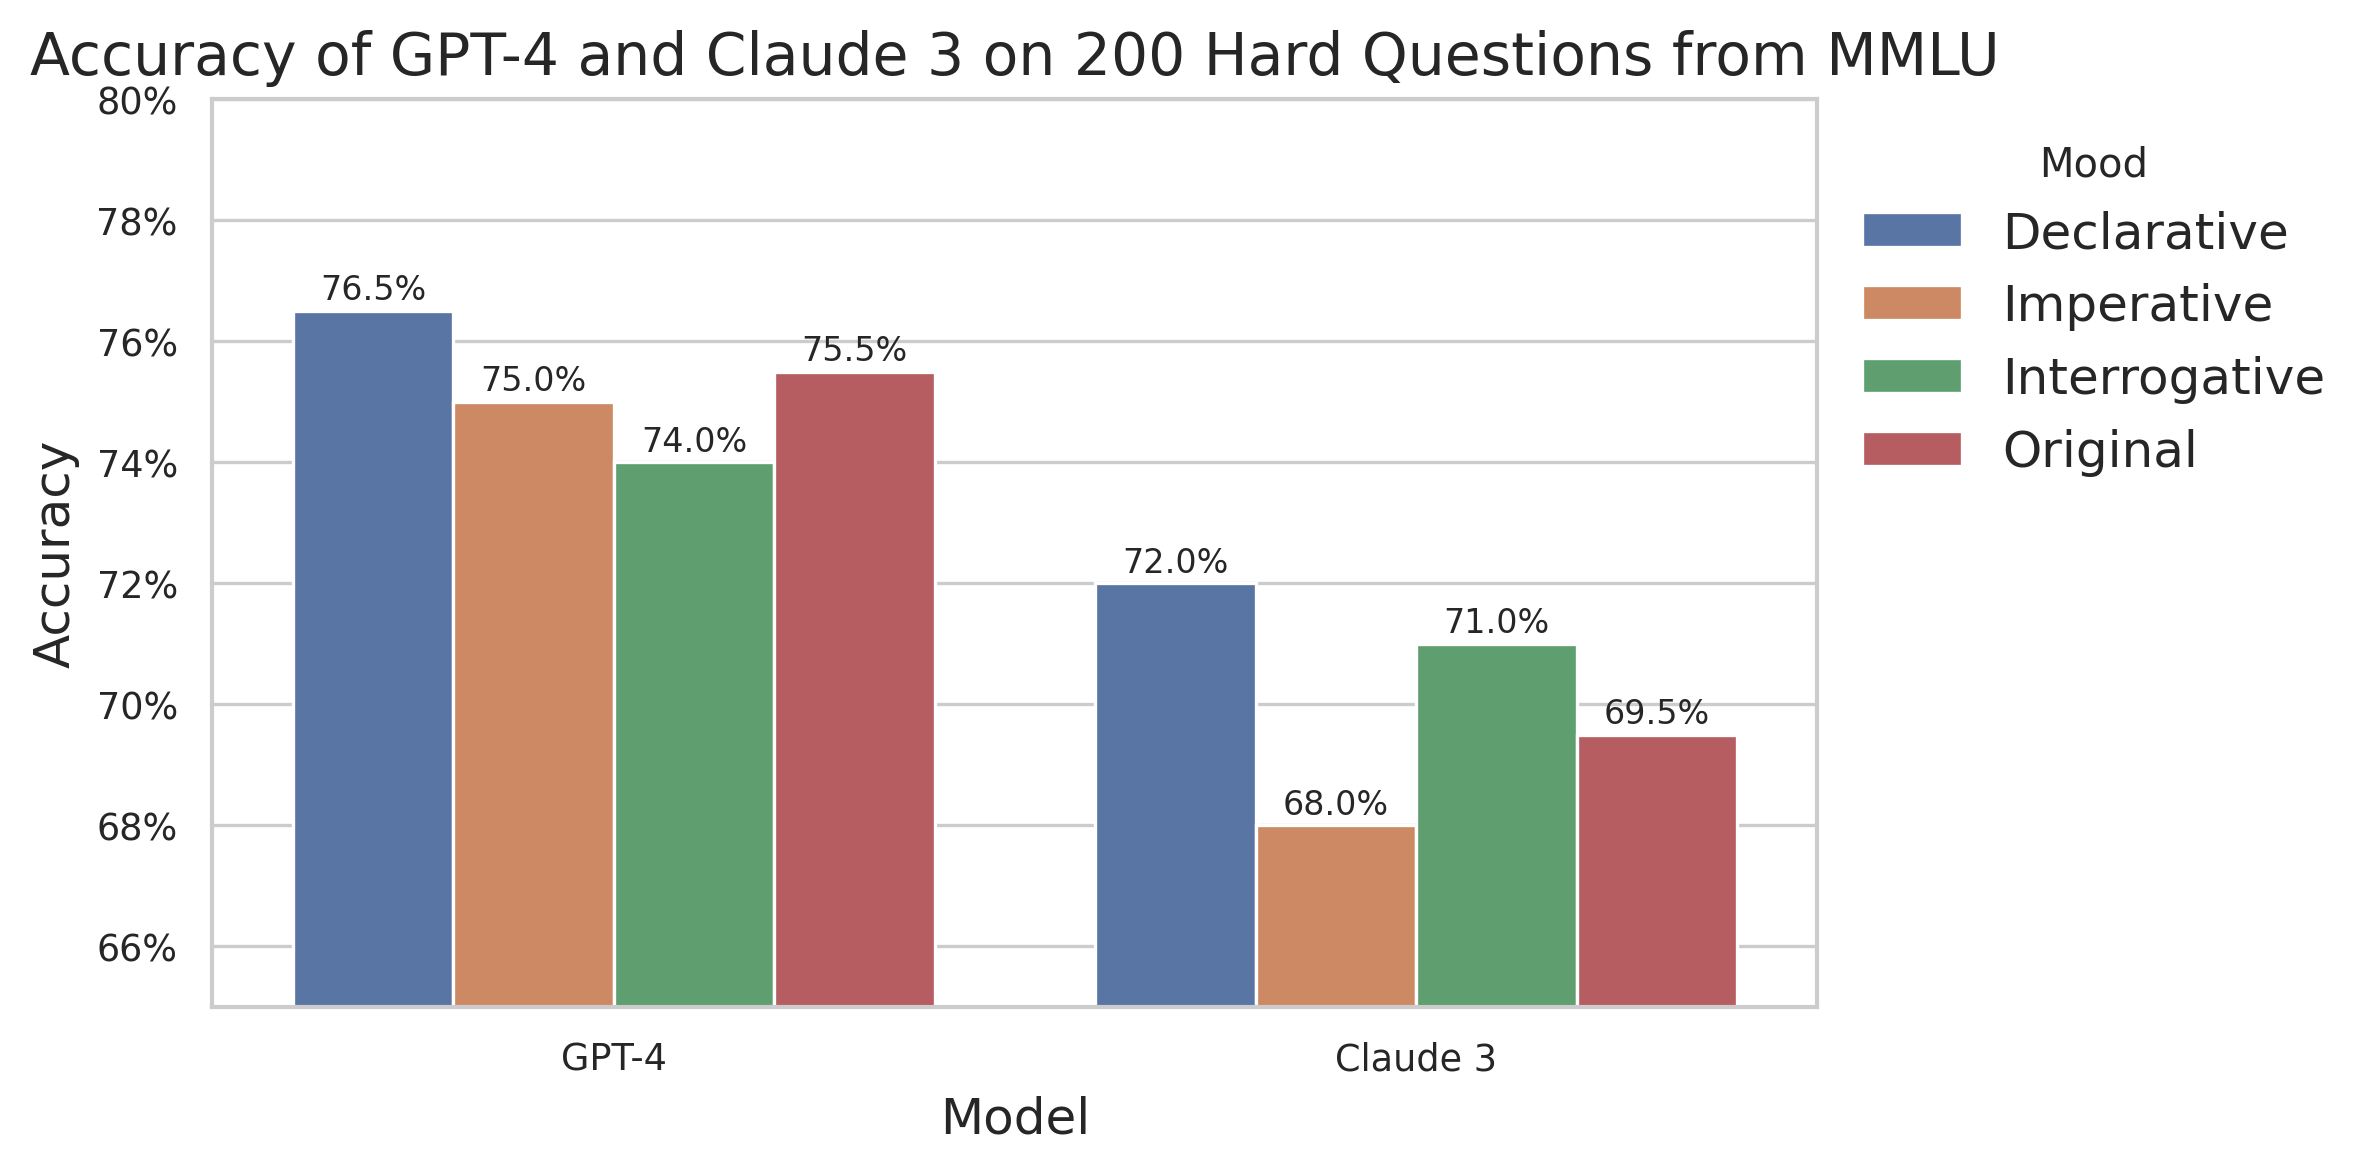

In [64]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', style='whitegrid')
plt.figure(figsize=(8, 4), dpi=300)

# Plotting
ax = df.melt(id_vars='Model').groupby(['Model', 'variable']).mean().sort_values('Model', ascending=False).reset_index().pipe((sns.barplot, 'data'), x='Model', y='value', hue='variable')

plt.ylim(0.65, 0.8)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('Accuracy of GPT-4 and Claude 3 on 200 Hard Questions from MMLU', fontsize=14)

# Adjust the legend to display outside the plot area
plt.legend(title='Mood', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)

# Add annotations
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, 
                xytext=(0, 5), textcoords='offset points')

# Format y-axis ticks as percentages
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
#plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

plt.tight_layout()
plt.show()